## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
clear_data = pd.read_csv('clear_data.csv')
train_data = pd.read_csv('train.csv')
X = clear_data
y = train_data['Survived']

In [6]:
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [8]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

- 模型评估是为了知道模型的泛化能力。
- 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
- 在交叉验证中，数据被多次划分，并且需要训练多个模型。
- 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
- 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
- 召回率（recall）度量的是正类样本中有多少被预测为正类
- f-分数是准确率与召回率的调和平均

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

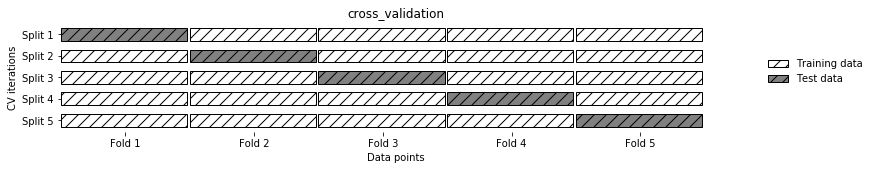

In [10]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [11]:
# 引入交叉验证的库
from sklearn.model_selection import cross_val_score


In [12]:
lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)

C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [13]:
# k折交叉验证
scores

array([0.82352941, 0.77941176, 0.80597015, 0.80597015, 0.8358209 ,
       0.88059701, 0.72727273, 0.84848485, 0.75757576, 0.71212121])

In [14]:
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


#### 思考4
* k折越多的情况下会带来什么样的影响？

在接近阈值之前准确率会不断增加，如果过了阈值之后会出现过拟合的问题。


#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

FN：False Negative,被判定为负样本，但事实上是正样本。

​FP：False Positive,被判定为正样本，但事实上是负样本。

​TN：True Negative,被判定为负样本，事实上也是负样本。

​TP：True Positive,被判定为正样本，事实上也是正样本。​

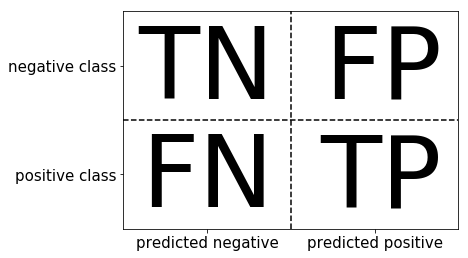

In [15]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

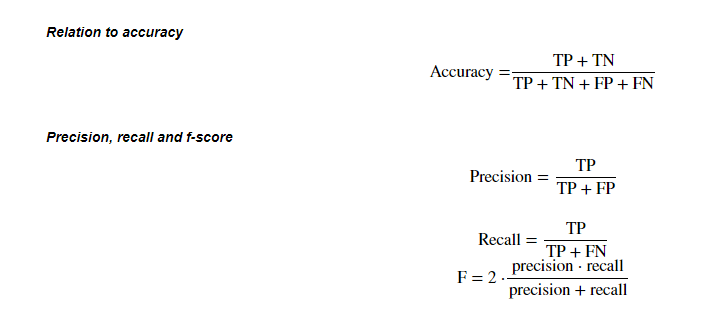

In [16]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [20]:
# 引入库
from sklearn.metrics import confusion_matrix

In [21]:
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

C:\Users\14675\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# 模型预测结果
pred = lr.predict(X_train)

In [23]:
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[350,  62],
       [ 71, 185]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

In [25]:
# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       412
           1       0.75      0.72      0.74       256

    accuracy                           0.80       668
   macro avg       0.79      0.79      0.79       668
weighted avg       0.80      0.80      0.80       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

1. 阳性和隐性由预测值决定，所以要从列上看
2. 真假由预测值是否跟真实值一致来决定。

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是OCR曲线，OCR曲线的存在是为了解决什么问题？

正确样本排在错误样本前面的概率

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [26]:
from sklearn.metrics import roc_curve

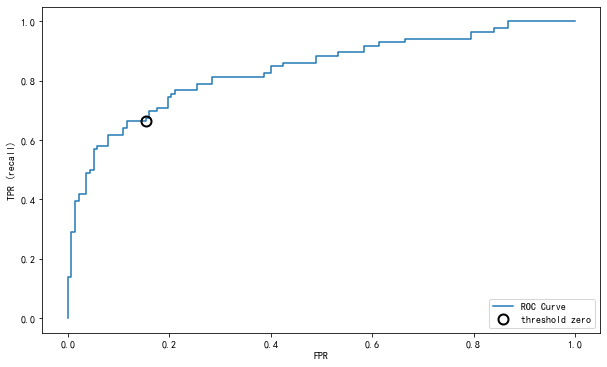

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### 思考6
* 对于多分类问题如何绘制ROC曲线

①方法一：每种类别下，都可以得到m个测试样本为该类别的概率（矩阵P中的列）。所以，根据概率矩阵P和标签矩阵L中对应的每一列，可以计算出各个阈值下的假正例率（FPR）和真正例率（TPR），从而绘制出一条ROC曲线。这样总共可以绘制出n条ROC曲线。最后对n条ROC曲线取平均，即可得到最终的ROC曲线。 

②方法二： 
首先，对于一个测试样本：1）标签只由0和1组成，1的位置表明了它的类别（可对应二分类问题中的‘’正’’），0就表示其他类别（‘’负‘’）；2）要是分类器对该测试样本分类正确，则该样本标签中1对应的位置在概率矩阵P中的值是大于0对应的位置的概率值的。基于这两点，将标签矩阵L和概率矩阵P分别按行展开，转置后形成两列，这就得到了一个二分类的结果。所以，此方法经过计算后可以直接得到最终的ROC曲线。 
上面的两个方法得到的ROC曲线是不同的，当然曲线下的面积AUC也是不一样的。 在python中，方法1和方法2分别对应sklearn.metrics.roc_auc_score函数中参数average值为’macro’和’micro’的情况。下面参考sklearn官网提供的例子，对两种方法进行实现。


【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

正确样本排在错误样本前面的概率